<a href="https://colab.research.google.com/github/edem-cyber/Base/blob/main/98_9_accurate_cnn_that_detects_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network to detect Pneumonia
### This is my first successful attempt at a convolutional neural net. I'll walk you through the steps taken to complete this neural net.

## Fundamental terms:
### NB: Analogies used in this explanation of the fundamental terms are in a school/calinary school environment
1. ** Overfitting **
      Overfitting occurs when a neural network model memorises patterns in a dataset instead of learning the general idea/pattern of the data.
      This is usually cause by an overly complicated neural network model.
      Analogy: When you spend too much time in cooking class than in a real resturant kitchen.
    
2. **Underfitting**
        Underfitting occurs when a  neural network model does not even recognise patterns in the dataset.
        This is usually caused by a too simple neural network model, or when there's too much noise in the dataset.
        Analogy: When you don't spend enough time to study for you test/exam, or when the curriculum is all over the place.

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
chest_xray  chest-xray-pneumonia.zip  kaggle.json


In [25]:
import os
from os import path
%cd /content/gdrive/MyDrive/Colab Notebooks/
if path.exists('/content/gdrive/MyDrive/Colab Notebooks/input') == False:
  os.mkdir('/content/gdrive/MyDrive/Colab Notebooks/input')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/input')
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/input"
!pwd
# # path = "/content/gdrive/MyDrive/kaggle"
# # os.mkdir(path)
# # ! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# ! pip install -q kaggle
# from google.colab import files
# files.upload()

# ! mkdir /.kaggle
# ! cp kaggle.json /.kaggle/
# ! chmod 600 /.kaggle/kaggle.json
# ! kaggle datasets list
# ! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


# !unzip \*.zip  && rm *.zip

/content/gdrive/MyDrive/Colab Notebooks
/content/gdrive/MyDrive/Colab Notebooks/input


**The main purpose of this notebook is to show you how to harness the power of convolutional neural networks in order to detect pneumonia in a person based of off their chest x-ray image.**
This tutorial assumes you know what a neural network is and a little bit of python.

**NB: You don't have to be an extensively experienced AI guru in order to follow this tutorial, I am not that experienced with machine learning myself, in fact, this is my second neural network.**

I hope you enjoy this mini tutorial and feel free to ask me any questions you don't understand in this tutorial, I'll make sure I explain thoroughly.
And if you're an experienced person in this field and you find mistakes in this notebook, please let me know, your wisdom is highly appreciated.

You can also check out these resources:

* [Best Reference Website](https://machinelearningmastery.com/)

* [Cheat sheet reference guides](https://github.com/kailashahirwar/cheatsheets-ai/blob/master/All%20Cheat%20Sheets.pdf)

**Videos**

* [YOLO Object Detection: Detecting Custom Images](https://www.youtube.com/watch?v=eFJOGsQ_YTA)

* [Deep Learning Concepts](https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)

* [Keras Practical Deep learning by Deep Lizard](https://www.youtube.com/watch?v=RznKVRTFkBY&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

* [Best Tutorials for absolut beginners](https://www.youtube.com/watch?v=ZzWaow1Rvho&list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So)

#### Importing essential libraries
Now we're importing all necesarry libraries for us to work with.

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from tensorflow.keras.models import Sequential #for neural network models
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from tensorflow.keras.utils import to_categorical #For One-hot Encoding
from tensorflow.keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from tensorflow.keras.callbacks import EarlyStopping

Exploring the paths of the dataset.
This is where our data is stored.

In [27]:
#Cheking datasets
import os
paths = os.listdir(path="/content/gdrive/MyDrive/Colab Notebooks/input")
print(paths)

['kaggle.json', 'chest_xray', 'chest-xray-pneumonia.zip', '.ipynb_checkpoints']


## Data Analysis and Preprocessing

### Now we're going to explore the dataset that contains chest x-ray images of people who have pneumonia and people who don't.
Our main goal is to predict if a person has pneumonia or not based of off their chest x-ray image.

#### So now we'll display one chest x-ray image of a person with pneumonia and one with a person without pneumonia, just to have a glimpse of what each image looks like in general.

Getting all images in the dataset

In [28]:
path_train = "/content/gdrive/MyDrive/Colab Notebooks/input/chest_xray/chest_xray/train"
path_val = "/content/gdrive/MyDrive/Colab Notebooks/input/chest_xray/chest_xray/val"
path_test = "/content/gdrive/MyDrive/Colab Notebooks/input/chest_xray/chest_xray/test"

#### Pneumonia:

In [29]:
img = glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

Converting the first image we get from the above directory/path into a numpy array

In [30]:
img = np.asarray(plt.imread(img[0]))

Plotting the image 

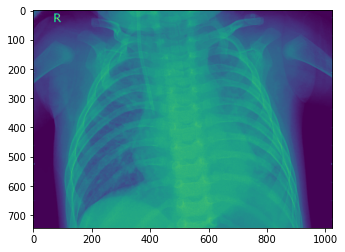

In [31]:
plt.imshow(img)

In [32]:
img.shape #Checking the shape of this image. It seems like a two deminsional shape (1422 x 1152)

(744, 1024)

#### Normal:

In [33]:
img = glob(path_train+"/NORMAL/*.jpeg") #Getting all images in this folder

In [34]:
img = np.asarray(plt.imread(img[0]))

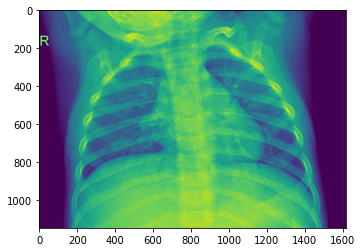

In [35]:
plt.imshow(img)

In [36]:
img.shape

(1147, 1616)

### Transforming the images
* Now we're applying a technique called Data Augmentation.
* We're changing the sizes of the images to 226 x 226 and we'll flip the images horizontally as well so that we can have more data(images) to train on.

#### In our dataset we're given three sets of images:
1. The training set. These are images we're going to train the neural network on.
2. The validation set. These are images we're going to use to check if the model is underfitting or overfitting, while training and compare the training and validation results in real time.
3. The test set. These are images we're going to use to check how good our neural network is with data it has not seen before.

In the following example, we're attempting to avoid overfitting by augmenting our image data.
Data augmentation means we're going to make slight variations to our data so that we have more data, without losing semantic meaning in our data.
The augmentation occurs in the parameters of the ImageDataGenerator method. To get a better understanding of these parameters you can check out [this link](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/) and [this one.](https://keras.io/preprocessing/image/)

Let me explain a few of them.
**horizontal_flip** set to true implies that some images in the data will be randomly horizontally flipped, as chest x-ray images don't have any significant meaning when horizontally flipped(at least for machine learning purpose).

**channel_shift_range** will randomly shift the channels of our images. Image channel refers to the RGB color scheme, which implies some imges will slightly vary in color.

**rotation_range** will slighty rotate the image according value given to it.

**zoom_range** will slightly zoom in to the image according value given to it.



In [37]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [38]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [39]:
val_batches.image_shape
print(len(train_data))

5216


## The Artificial Neural Network
### This particular neural network is called a convolutional neural network because it has convolutional layers that convolve the images/arrays of data it's being trained on.
This model is based off a model that won the ImageNet competition back in 2014

One of the best things about being in a tech industry is that fellow smart techies who've created cool and robust neural network are generous enough to share their model architecture with us, so we don't have re-invent the wheel.
This will save us some time and headache. We're going to use a method known as **transfer learning**. This means instead of creating a brand new neural net that's going to be time consuming, we can just use a pre-trained [good] model and fine tune it in order for it to work for our own scenario.

Usually when people do transfer learning, they use both the architecture and weights of a pre-trained model. But in this tutorial we're only using the architecture of a pretrained model, not their weights.

Source to model is [here.](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3)

In [40]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [41]:
#Viewing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 113, 113, 128)    

### Training the neural net

Now the training begins

We're training our model for 5 epochs.
This means we're giving the model 5 chances to learn patterns about our data.

During training we will apply a technique called Early Stopping. This technique will stop training of the model if there's no improvement during the training process(this helps with not wating time and resources).
In the below example of early stopping, our parameter **patience** tells the model to stop training if there's no improvements after 3 consecutive epochs, and monitor tells the model which metric to look at in order to apply early stopping.
For more information on this very useful method check out [this page](https://keras.io/callbacks/).

In [ ]:
optimizer = Adam(learning_rate = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 5, monitor = "val_accuracy", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=5, callbacks=[early_stopping_monitor], shuffle=True, validation_data=test_batches, generator=train_batches, steps_per_epoch=len(train_data)/64 ,verbose=2)
prediction = model.predict_generator(generator=train_batches, verbose=2, steps=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
81/81 - 5477s - loss: 0.3547 - accuracy: 0.8510 - val_loss: 1.0322 - val_accuracy: 0.6442
Epoch 2/5


## Ploting the model performance

Now we're going to plot the model's performance

### What does this all mean?
  If validation/test accuracy is greater than training accuracy, that's good, it means our model has managed to learn and get a general idea/pattern of our data.
  But if training accuracy is greater than validation/testing accuracy, tha's not good. That means our model is overfitting.
 
 
 The opposite is true for the loss chart.
 The ideal situation is to have validation/test loss way low. But train loss should not be lower than test/validation loss.

## Model Accuracy Chart

In [ ]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Model Loss Chart

In [ ]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()